In [30]:
# Before submission, set this to True so that you can render and verify this notebook without retraining all the deep learning models.
# All models will be loaded from file instead.
stop_training = True

In [31]:
# Uncomment the following line to run in Google Colab
# This will link the notebook to your Google drive to store your models and cache the dataset.
# This will probably ask you to click on a link to get a verification code.

#from google.colab import drive
#drive.mount('/content/drive')

In [32]:
# Uncomment the following line to run in Google Colab to install OpenML

#!pip install --quiet openml 

# Uncomment to install pydot (for generating the report)
# !pip install pydot

In [33]:
# Uncomment the following to check whether you have access to a GPU in Google Colab
# See further instructione below.

# import tensorflow as tf
# tf.config.experimental.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [34]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [35]:
# Uncomment to use OpenML caching with your Google Drive. After longer periods of inactivity, your Colab VM may be recycled, 
# in which case the dataset will have to be downloaded again. To avoid this, use the code below to let OpenML cache the dataset 
# on your Google Drive.
# On your local machine, it will store data in a hidden folder '~/.openml'

#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [36]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(tensorflow_version) < version.parse("2.2.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.2 or later (e.g. 2.4)".format(tensorflow_version))
elif version.parse(tensorflow_version) < version.parse("2.4.0"):
    print("Tensorflow version is <2.4. This will likely work but we recommend updating to 2.4".format(tensorflow_version))
else:
    print("Looks good. You may continue :)")

Looks good. You may continue :)


# Assignment 3

In [37]:
# Fill in your names using the format below
your_name = "Beeren, Nimo"

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed up training a lot. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 4th cell on the top of this notebook to check that the GPU is found.

Note that the free version of Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine. Take this into account in your planning, so that you don't do all your training at the last moment and are locked out right before the deadline.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you. Be sure to upload all .h5 and .p files, as well as any .json files created (these are created only for large models).

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
  * The 2nd cell (above) does this programmatically for you
* Fill in the path to your assignment folder below
  * It's likely `base_dir = '/content/drive/My Drive/assignment-3-name'`
  * 'name' will likely be your github handle

In [38]:
# Define where the models should be stored
base_dir = './'

### Verification and submission

If you use Colab, there are a few things to consider before submission:
* You need to download the notebook and all the models from your Google Drive to a local folder. Models should be stored in the main directory, next to your notebook.
* To run the notebook locally (e.g. for the verification script), make sure that you have set `stop_training = True` in the first cell to avoid retraining all models. Also comment out any Colab-specific code in the cells above.
* Set `base_dir` back to your local directory where the files are, likely `base_dir = './'`
* Again, don't wait until the last moment to verify and submit.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are. We provide code below that stores the model efficiently. Smaller models are simply stored entirely to disk as one h5 file. For larger models, we will only store the weights (h5 file) and structure (json file), and ignore the state of the optimizer. In any case, the weights alone should not take more than 100MB of storage. Take this into account especially for loading pre-trained models in the last question. Bigger pre-trained models are not always better - in fact they will easily overfit. Make sure that your model weights take less than 100MB of storage.
* When questions ask you to provide an explanation, it should be less than 800
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 120 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters", yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your models perform. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance, with the top grade awarded to the best model in class. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* The dataset we will use is quite large and can take a while to download and cache for the first time, especially if you have limited RAM on your local device (laptop). Once cached, it should load fast. Even if you use Colab, at least run the notebook once locally when you start doing the assignment (i.e., now). That way the dataset will be cached so that you can do the verification faster.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model. Don't say 'I tried every possible option and this is the best I found', but rather 'I tried X because I think that Y' and then interpret the results and what you learned from them'.
* **Be original. We will check for plagiarism between student submissions.**

### Data
The [Oxford Pets](https://www.openml.org/d/42820) dataset contains 128-by-128 RGB images of 37 different types of cats and dogs. Your goal is to build models that recognize the correct type of animal in each image. Below is the list of all classes and the subset of cat breeds.

In [39]:
# Download the Oxford Pets dataset. Takes a while, and quite a bit of memory when it 
# needs to download. After caching it loads faster.
oxford_pets = oml.datasets.get_dataset(42819)
X, y, _, _ = oxford_pets.get_data(dataset_format='array',
    target = oxford_pets.default_target_attribute)

class_names = ['abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 
               'bengal', 'birman', 'bombay', 'boxer', 'british_shorthair', 'chihuahua', 'egyptian_mau', 
               'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese',
               'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher', 'newfoundland',
               'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue', 'saint_bernard', 'samoyed', 'scottish_terrier',
               'shiba_inu', 'siamese', 'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
cat_breeds = ['abyssinian', 'bengal','birman', 'bombay', 'british_shorthair', 'egyptian_mau', 'maine_coon',
              'persian', 'ragdoll', 'russian_blue', 'siamese', 'sphynx']

Reshape, sample and split the data

In [40]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),128,128,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [41]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

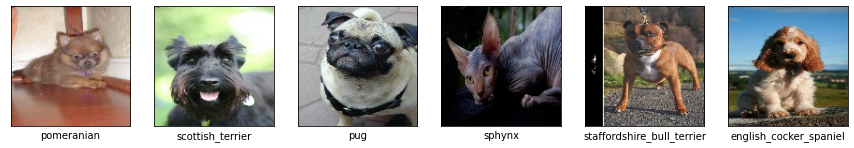

In [42]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(15,30))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel(class_names[np.argmax(y[n])])
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(6)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [43]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

# Helper function for user feedback
def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# Helper function to format answers
def print_answer(ans):
    output = ""
    for line in ans.splitlines()[0:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
    

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        # if a json description is available, load config and then weights
        if os.path.isfile(os.path.join(base_dir, name+'.json')):
            json_file = open(os.path.join(base_dir, name+'.json'), 'r')
            loaded_model_json = json_file.read()
            json_file.close()
            model = model_from_json(loaded_model_json)
            model.load_weights(os.path.join(base_dir, name+extension))
        # else just load the entire model from hdf5 file
        else:
            model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed.
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
    # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
        print("Model larger than 100MB, storing weights only.")
        model.save_weights(path)
        model_json = model.to_json()
        with open(os.path.join(base_dir, name+".json"), "w") as json_file:
            json_file.write(model_json)

# Evaluation harness
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data is given as a generator or not. Set batch size to None when using a generator.
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with. Set batch size to None when using a generator.
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    print_model -- whether or not to print the model
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(base_dir,name+'.png'))

Max val score: 2.72%


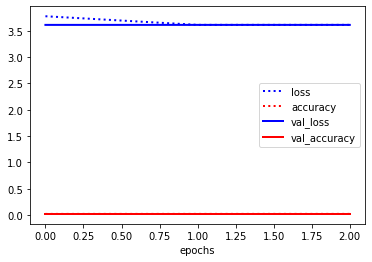

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                491530    
_________________________________________________________________
dense_1 (Dense)              (None, 37)                407       
Total params: 491,937
Trainable params: 491,937
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
# Toy usage example
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((49152,), input_shape=(128,128,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(37, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=True, epochs=3, batch_size=32)

Max val score: 2.72%


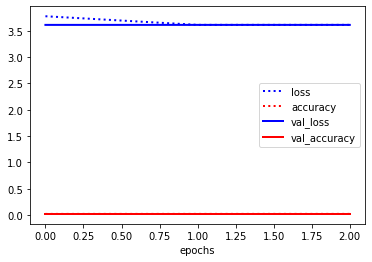

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                491530    
_________________________________________________________________
dense_1 (Dense)              (None, 37)                407       
Total params: 491,937
Trainable params: 491,937
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
# Toy usage example
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Convolutional neural networks (15 points)
### Question 1.1: Design a ConvNet (12 points)
- Build a sequential convolutional neural network to distinguish cats from dogs. You can use the relabeling to a binary problem below.
- Try to achieve the best validation accuracy you can. You should be able to get at least 75% accuracy. 85% or more is also possible. You can use any depth, any combination of layers, and any kind of regularization and tuning. You can use different batch sizes and number of epochs as in question 1.
- Add a description of your design choices in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- Explictly explore different filter sizes and padding techniques. Explain what the effect is, also in relationship with the layer input sizes.
- You are allowed **1000** characters for this answer (but don’t ramble).
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data as shown below.

In [46]:
# Makes the problem binary. Don't change or overwrite these variables.
pets_classes = {0: "cat", 1: "dog"}
train_classes = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_train])
val_classes  = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_val])
y_train_binary = np.array([0 if class_names[train_classes[i]] in cat_breeds else 1 for i in range(len(y_train))])
y_val_binary = np.array([0 if class_names[val_classes[i]] in cat_breeds else 1 for i in range(len(y_val))])
evaluation_split_binary = X_train, X_val, y_train_binary, y_val_binary

Max val score: 87.16%


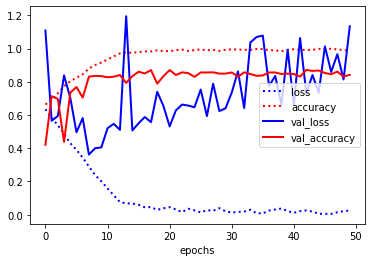

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)      

In [47]:
from keras import regularizers
from tensorflow.keras import optimizers, models, layers

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(128,128,3)))
#     model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
#     model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
#     model.add(layers.Dropout(0.1))
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
#     model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
#     model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
#     model.add(layers.Dropout(0.1))
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
#     model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
#     model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
#     model.add(layers.Dropout(0.1))
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
#     model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
#     model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
#     model.add(layers.Dropout(0.1))
    model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
#     model.add(layers.Conv2D(256, (3,3), padding='same', activation='relu'))
#     model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2,2)))
#     model.add(layers.Dropout(0.1))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.BatchNormalization())
#     model.add(layers.Dense(512, activation='relu'))
#     model.add(layers.Dropout(0.1))
#     model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split_binary, base_dir, 
               train=True, epochs=50, batch_size=32)

# Conv 32 + MaxPool 2 + Dense 128, batch 32 = overfits a lot
# more layers = still overfits
# dropout = overfits less, accuracy stuck around 80%
# use VGG-like model, dense 512, add dropout at every block = almost no improvement
# add batch normalization = less overfitting, acc around 82%
# batch 64, use 7x7 and 5x5 filters in first layers = much slower training, unpredictable accuracy
# batch 64, higher drop-out in later layers = slower training, accuracy around 78%
# batch 32 = no change in training speed, few % better
# smaller dropout overall, reduce dense 256 = slightly slower per epoch, and worse accuracy (fewer weights?)
# dropout 0.3 0.3 0.5, dense 512 = around 80 again
# dropout 0.7 = takes longer for train acc to reach 100%, no change in val acc
# dropout 0.3, no padding in first block = reaches train 100% very fast, no change in val
# more conv layers per block, 3 3 2 = slower per epoch, val still at 80%
# back to 1 1 1 conv layers = faster per epoch, val down to 77%
# two dense 1024 = worse val
# dropout 0.8 = val doesn't converge, training does but very slowly
# dropout 0.5 0.5 0.7
# 4 blocks = bit better accuracy
# adam optimizer = faster per epoch

answer_q_1_1 = """
I started with a simple model consisting of 3 blocks of (convolutional, maxpool) layers.
Using stride 2, the size of the image is halved after each maxpool layer. To compensate, I doubled
the amount of convolutional filters after each maxpool layer. This model overfitted quite heavily, 
so I added dropout layers to increase regularization. This improved validation accuracy, but not much.
I then tried to use larger filters (5x5 and 7x7), which slowed down training a lot, and created a lot
of variance in accuracy between epochs, so I decided to stick to 3x3 filters. One thing that did improve
performance is to make the model deeper (more blocks). This is possible because the resolution is
relatively high, and I used padding on the convolutional layers, which ensures the size doesn't drop too
quickly. Finally, I tried different optimizers, and found Adam to have the best trade-off of speed and
accuracy.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not? Reason
about what might work or not on these images.
- Implement the generator in a function `augment_data` that returns a generator and the validation set
- Evaluate the model from question 1.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_1_2'.
- Add a description of your design choices in 'answer_q_1_2': explain what you did and also why. Also discuss the performance of the model.

Max val score: 92.43%


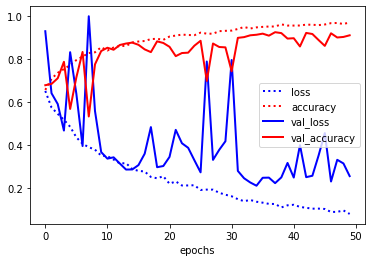

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 128)      

In [48]:
# Note that we build the same untrained model as in question 1.1 but store the 
# trained version as model_1_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_data():
    """ Augments the data and returns a generator and the validation data and labels
    """
    # Boilerplate code. You can change this however you like.
    generator = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    ).flow(X_train, y_train_binary, batch_size=64)
    return generator, X_val, y_val_binary

# Batch size should be None since we are using a generator.
# You can add a steps_per_epoch parameter if you like
run_evaluation("model_1_2", build_model_1_1, augment_data(), base_dir, 
               train=True, generator=True, epochs=50, batch_size=None)

# small image transforms = 85%, no overfitting, but slow to converge
# reduce dropout = little bit faster converge, no improvement in acc
# simpler model = 87%, maybe underfitting a bit
# remove dropout/batchnorm except after last layer = 89%, could be overfitting towards the end
# steps_per_epoch 15, 100 epochs = worse acc same speed

answer_q_1_2 = """
I chose to use only minor image adjustments, because that was already enough to almost completely
prevent overfitting. I used image shifts, but not too large, since that could place the subject
partially out of view, which loses information. I used horizontal flips, since most subjects are
fairly symmetrical on that axis, so the generated image still looks realistic.
Since the model was not overfitting at all, I reduced regularization in an attempt to make the model
converge quicker. I removed dropout and batch normalization on all but the last layer. The idea is
that the model is more likely to overfit on more complex patterns that occur in the later layers.
Since the loss curve was quite erratic, I increased the batch size. This helped, but the model did 
overfit a bit more.
"""

print("Answer is {} characters long".format(len(answer_q_1_2)))

## Part 2. Model interpretation (15 points)
### Question 2.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_1_2) by evaluating it on the test data. You do not need to retrain the model, you can just reload it.
* What is the accuracy of model_1_2 on the test data? Store this in 'test_accuracy_2_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Analyze the misclassifications in more depth by visualizing which kinds of mistakes are made for each class (cat or dog). For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'. This is more of an open question. Some examples are sufficient, you don't need to plot all misclassifications.
* Summarize your findings in 'answer_q_2_1'. Is your model performing well, or
is it misguided in some way?

In [49]:
from sklearn.metrics import accuracy_score

model = load_model_from_file(base_dir, 'model_1_2')
y_pred = model.predict(X_test)
y_pred_binary = [0 if y < 0.5 else 1 for y in y_pred]
test_classes = np.array([np.argmax(one_hot_vector) for one_hot_vector in y_test])
y_test_binary = np.array([0 if class_names[test_classes[i]] in cat_breeds else 1 for i in range(len(y_test))])

def evaluate_model():
    return accuracy_score(y_test_binary, y_pred_binary)
    
test_accuracy_2_1 = evaluate_model()

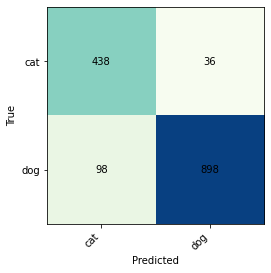

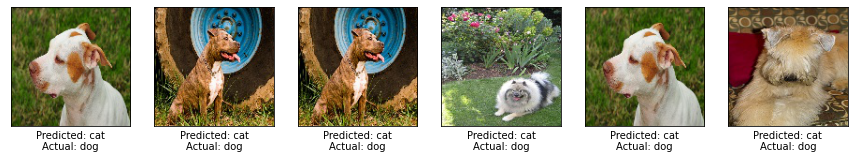

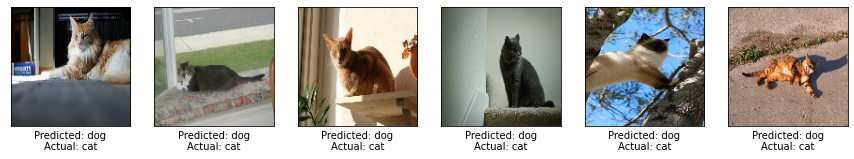

Answer is 178 characters long


In [50]:
from sklearn.metrics import confusion_matrix
from random import randint

def plot_confusion_matrix():
    cm = confusion_matrix(y_test_binary , y_pred_binary)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap='GnBu')
    ax.set_xticks(np.arange(2)), ax.set_yticks(np.arange(2))
    ax.set_xticklabels(list(pets_classes.values()), rotation=45, ha="right")
    ax.set_yticklabels(list(pets_classes.values()))
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    for i in range(4):
        ax.text(int(i/2),i%2,cm[i%2,int(i/2)], ha="center", va="center")
        
def plot_misclassifications():
    i_wrong_cats = []
    i_wrong_dogs = []
    for i in range(len(y_test_binary)):
        if y_pred_binary[i] != y_test_binary[i]:
            if y_pred_binary[i] == 0:
                i_wrong_cats.append(i)
            else:
                i_wrong_dogs.append(i)
            
    # Takes a list of row ids, and plots the corresponding images
    # Use grayscale=True for plotting grayscale images
    def plot_images(X, y_true, y_pred, grayscale=False):
        fig, axes = plt.subplots(1, len(X),  figsize=(15,30))
        for n in range(len(X)):
            if grayscale:
                axes[n].imshow(X[n], cmap='gray')
            else:
                axes[n].imshow(X[n])
            axes[n].set_xlabel(f'Predicted: {pets_classes[y_pred[n]]}\nActual: {pets_classes[y_true[n]]}')
            axes[n].set_xticks(()), axes[n].set_yticks(())
        plt.show()

    i_wrong_cats_subset = [i_wrong_cats[randint(0, len(i_wrong_cats)-1)] for i in range(6)]
    X_random = [X_test[i] for i in i_wrong_cats_subset]
    y_true_random = [y_test_binary[i] for i in i_wrong_cats_subset]
    y_pred_random = [y_pred_binary[i] for i in i_wrong_cats_subset]
    plot_images(X_random, y_true_random, y_pred_random)
    
    i_wrong_dogs_subset = [i_wrong_dogs[randint(0, len(i_wrong_dogs)-1)] for i in range(6)]
    X_random = [X_test[i] for i in i_wrong_dogs_subset]
    y_true_random = [y_test_binary[i] for i in i_wrong_dogs_subset]
    y_pred_random = [y_pred_binary[i] for i in i_wrong_dogs_subset]
    plot_images(X_random, y_true_random, y_pred_random)
    

plot_confusion_matrix()
plot_misclassifications()

answer_q_2_1 = """
Overall, dogs are more often misclassified as cats than the other way around.
There doesn't seem to be a clear pattern that leads to a misclassification of either cats or dogs.
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Visualizing activations (8 points)

* Select the **14th** example from the test set (index 13, it should be a small dog). Retrieve and visualize the activations (feature maps) of model 1_2 for that example, for every filter for different convolutional layers (at different depths in the network). Implement a function `plot_activations()` that returns these activations. Check the code in the notebook of the CNN lecture to see how this is usually done.
* Give an explanation (as detailed as you can) about your observations in 'answer_q_2_2'. Is your model indeed learning something useful?

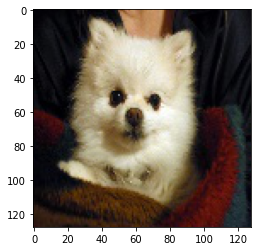

In [51]:
plt.imshow(X_test[13]);

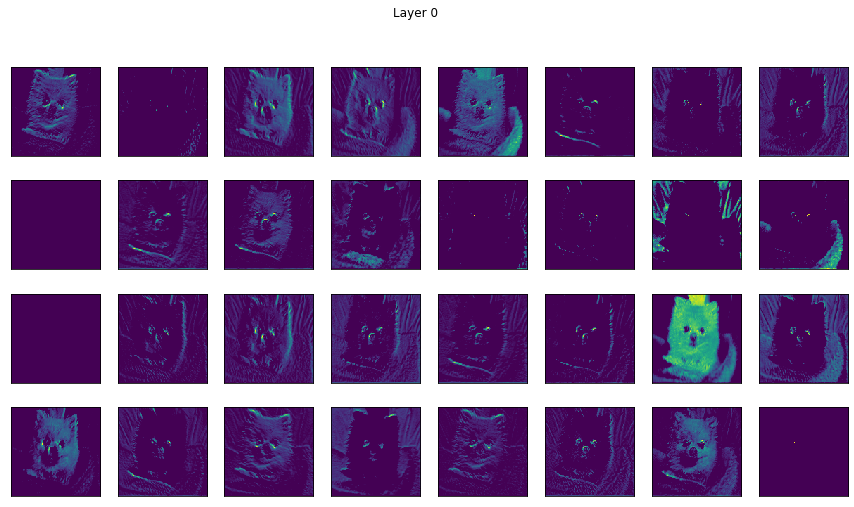

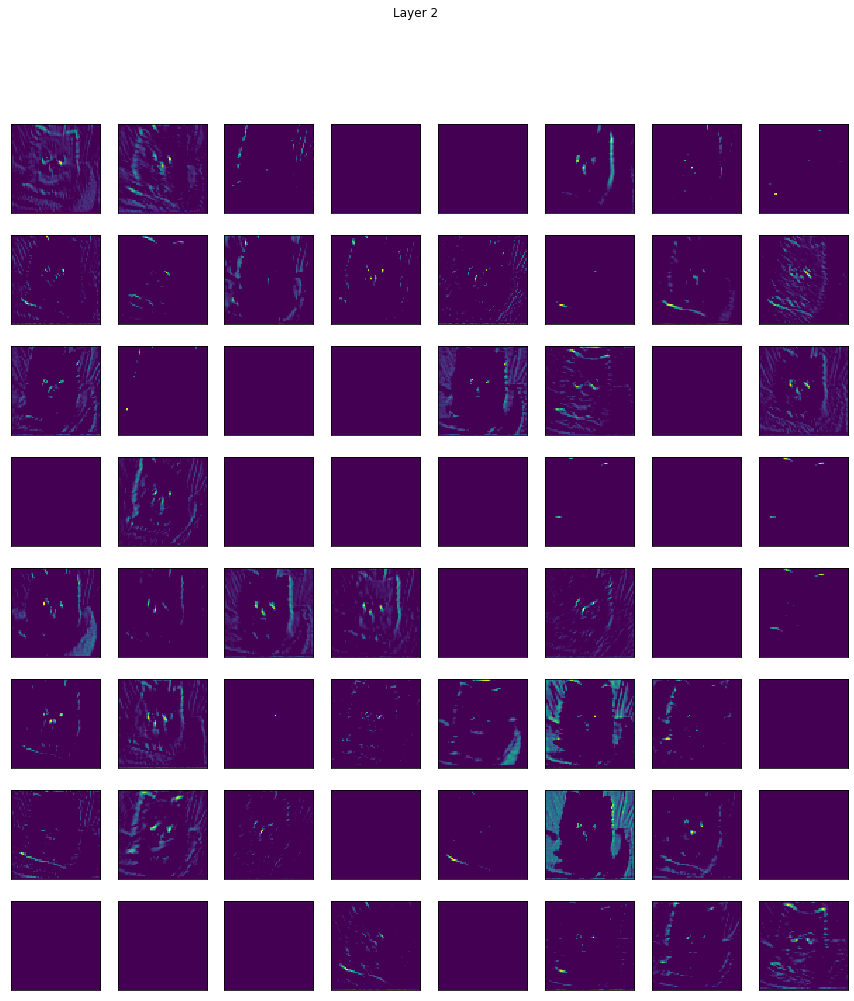

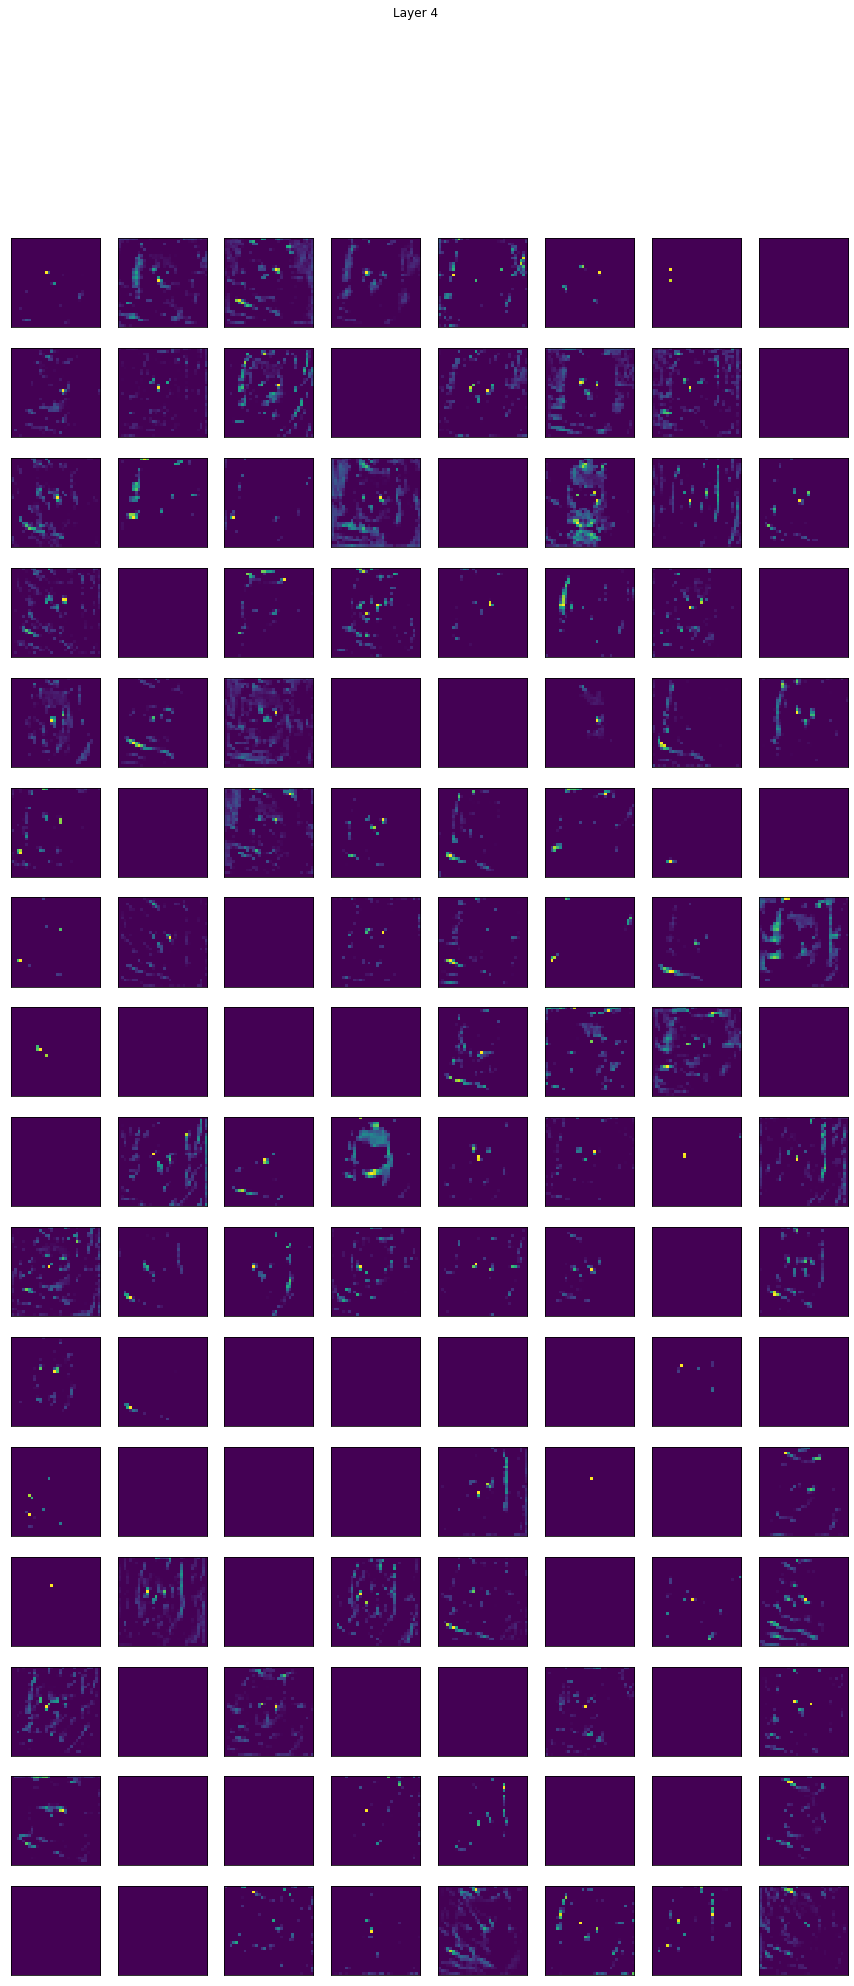

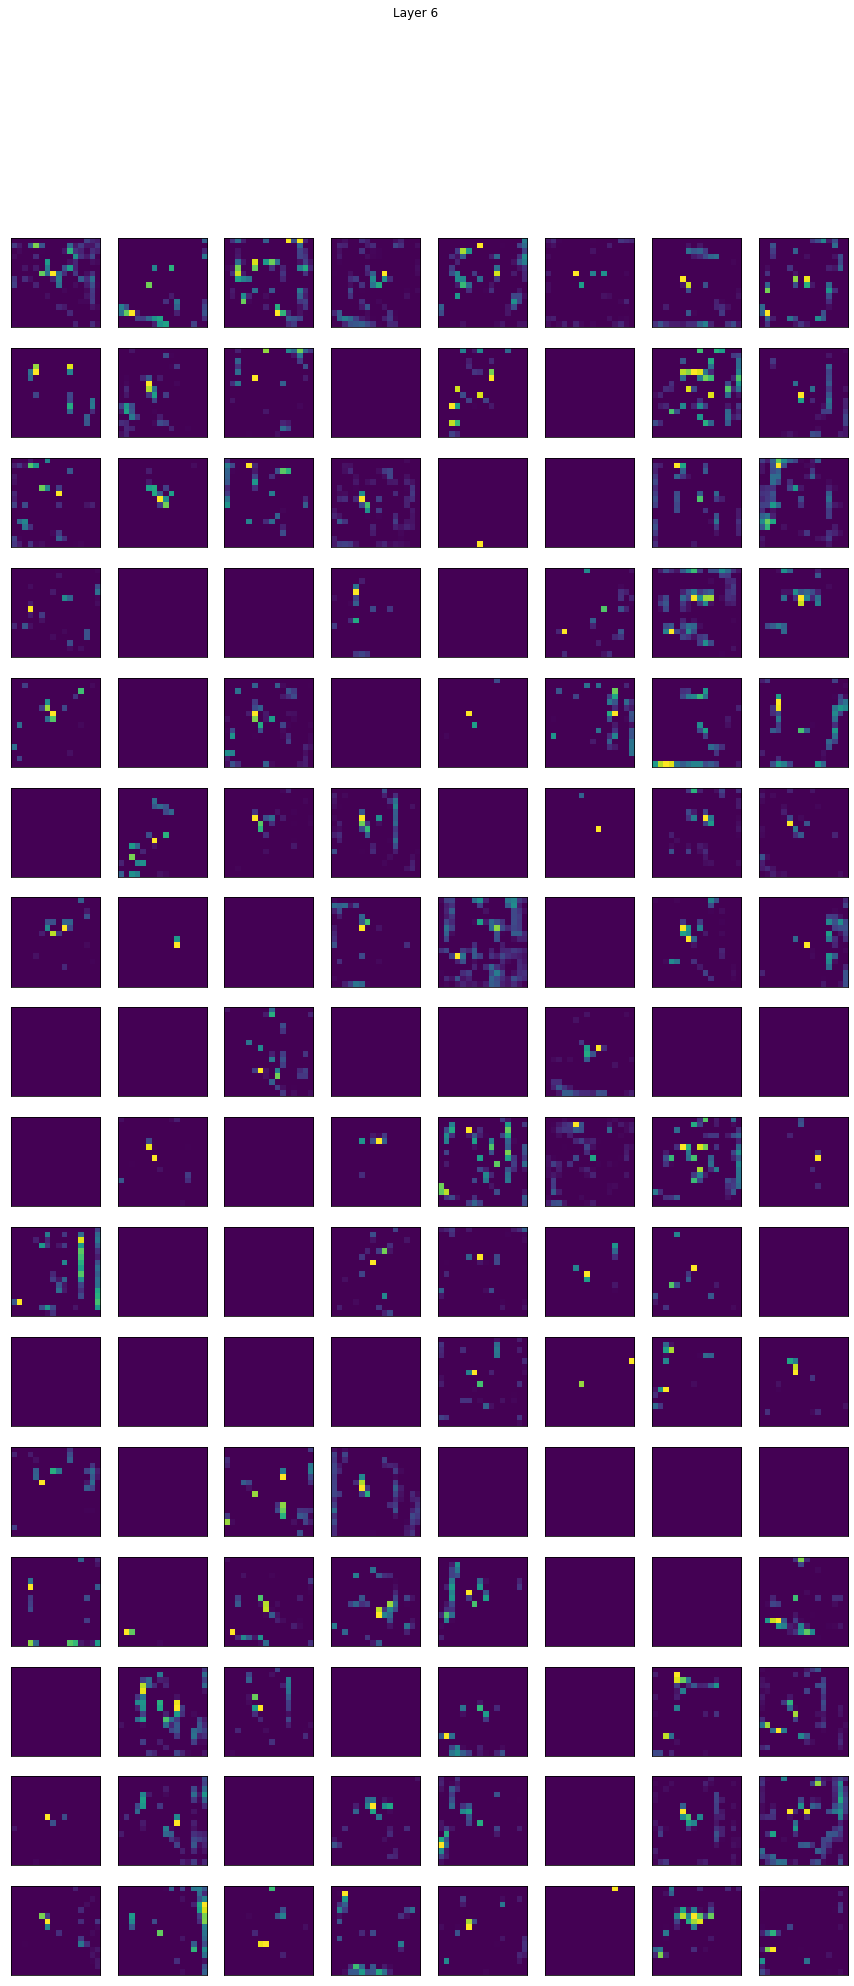

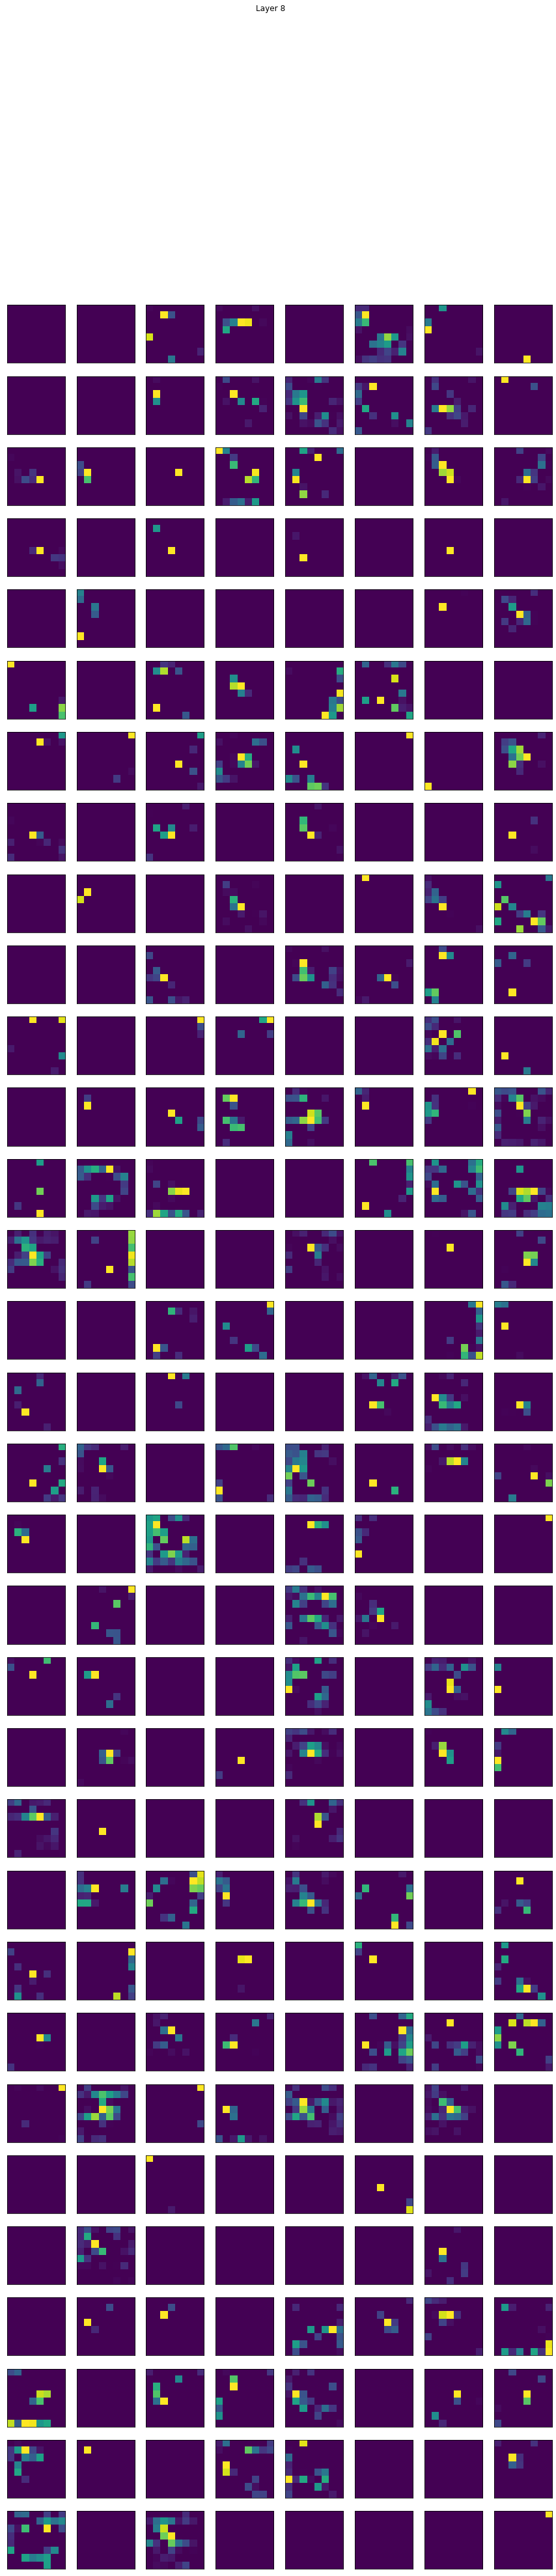

In [52]:
from math import ceil, floor
from tensorflow.keras import models

def plot_activations():
    # Extracts the outputs of the top 10 layers:
    layer_outputs = [layer.output for layer in model.layers[:10]]
    # Creates a model that will return these outputs, given the model input:
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    img = np.expand_dims(X_test[13], axis=0)
    activations = activation_model.predict(img)
    
    conv_layers = [0, 2, 4, 6, 8]
    
    for layer in conv_layers:
        num_filters = activations[layer].shape[-1]
        cols = 8
        rows = ceil(num_filters / cols)
        fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 2))
        fig.suptitle(f'Layer {layer}')
        for i in range(num_filters):
            ax = axes[int(i / cols), i % cols]
            ax.matshow(activations[layer][0, :, :, i], cmap='viridis')
            ax.set_xticks([])
            ax.set_yticks([])
    
    
plot_activations()

In [53]:
answer_q_2_2 = """
There are 5 convolutional layers in the model, each increasing in level of abstraction.
The first layer detects simple patterns, such as edges, fuzziness or brightness. Some 
of these are already quite good at distinguishing the dog from the background. Moving 
to the deeper layers, we see some filters that detect more specific things, such as
ears, eyes and the nose. At layers 6 and 8 (the 4th and 5th convolutional layers) the 
patterns are quite abstract, and not so easy to interpret. Some of these seem to be 
detecting larger features like the outline of the dog. Most don't seem particularly
useful, but it's hard to say as the model could be detecting very abstract things that
do contain some information.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

Answer is 719 characters long


### Question 2.3: Visualizing the learned embeddings with tSNE (5 points)

Extract the learned embeddings of the images from X_train using your `model_1_2` and plot them on a 2D map using [tSNE](https://lvdmaaten.github.io/tsne/) as the dimensionality reduction technique.

- Implement a function `create_embeddings` to extract the n-sized embeddings based on the  Convolutional part of `model_1_2` (e.g VGG16 generates 512-sized embeddings)
- Implement a function `compute_tsne` that applies scikit-learn's implementation of [tSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to reduce the size of the embeddings from n to 2 (e.g for VGG16 this will mean `original_array` of  size (num_images, 512) compressed to a reduced array of size (num_images, 2))
- Implement a function `plot_tsne` that plots the 2D vector on a map highlighting the formed clusters, and color-coded by the true binary labels
- Interpret the results from the map in `answer_q_2_3`

In [54]:
from sklearn.manifold import TSNE
import re

def create_embeddings(model_file):
    """ Returns the image embeddings of X_train learned in the given model
    """
    model = load_model_from_file(base_dir, model_file)
    output_layer = None
    for layer in model.layers:
        if re.match(r'flatten|global_average_pooling2d', layer.name):
            output_layer = layer
            break
    feat_model = models.Model(inputs=model.input, outputs=output_layer.output)
    features = feat_model.predict(X_train)
    return features

def compute_tsne(original_array):
    """ Returns the 2D embeddings of original_array created by TSNE
    """
    return TSNE(n_jobs=-1, random_state=0).fit_transform(original_array)

# n-sized embeddings extracted from X_train and reduced to 2-sized embeddings
dn_embs = create_embeddings("model_1_2")
d2_embs = compute_tsne(dn_embs)

Answer is 371 characters long


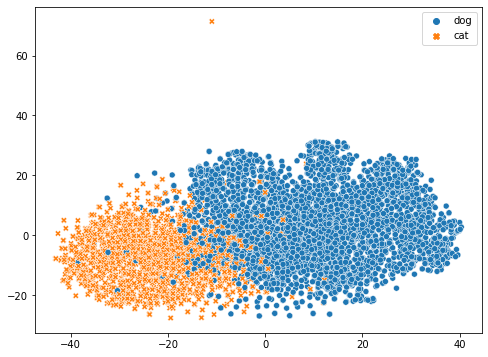

In [55]:
import seaborn as sns

def plot_tsne(tsne_embeds, labels):
    fig = plt.gcf()
    if np.max(labels) <= 1:
        classes = [pets_classes[lab] for lab in labels]
        style = classes
        legend = 'auto'
        fig.set_size_inches(8, 6)
    else:
        classes = [class_names[lab] for lab in labels]
        style = 0
        legend = False
        fig.set_size_inches(12, 8)
    sns.scatterplot(x=tsne_embeds[:,0], y=tsne_embeds[:,1], hue=classes, style=style, legend=legend)
    

plot_tsne(d2_embs, y_train_binary)

answer_q_2_3 = """
There are two general areas, one for cats and one for dogs, but there is also some overlap
between the two. Some dogs are considered to be cat-like, and some cats are dog-like. The
amount of overlap explains the misclassifications we saw earlier. There is one cat image
that is considered very different from any other image, since it is far away from the other
points.
"""
print("Answer is {} characters long".format(len(answer_q_2_3)))

## Part 3. Transfer learning (20 points)
### Question 3.1 Transfer learning from VGG16 (8 points)

- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_3_1` that adds at least one dense hidden layer and output layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers, in a systematic way, and evaluate whether that works better. You can also consider adding multiple dense hidden layers and regularization layers.
- Train the resulting model on the augmented training data for the 37-class problem (**not binary classification**).
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_3_1'.

Max val score: 61.39%


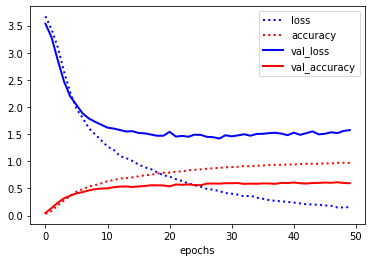

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_27 (Dense)             (None, 37)                9509      
Total params: 16,821,605
Trainable params: 9,186,341
Non-trainable params: 7,635,264
_________________________________________________________________
None
Answer is 665 characters long


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import re

# Load ImageNet pre-trained VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

def augment_data_multi_class():
    """ Augments the data and returns a generator and the validation data and labels
    """
    # Boilerplate code. You can change this however you like.
    generator = ImageDataGenerator(
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    ).flow(X_train, y_train, batch_size=64)
    return generator, X_val, y_val

def build_model_3_1():
    # Compose new model
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(37, activation='softmax'))
    
    # Unfreeze some layers
    conv_base.trainable = True
    for layer in conv_base.layers:
        if re.match(r'block5_conv\d', layer.name):
            layer.trainable = True
        else:
            layer.trainable = False

    # Compile and return model
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizers.Adam(learning_rate=1e-5), 
        metrics=['accuracy']
    )
    return model

run_evaluation("model_3_1", build_model_3_1, augment_data_multi_class(), base_dir, 
               train=True, generator=True, epochs=50, batch_size=None)

# all conv layers frozen: 36%, loss steadily decreasing, starting to overfit a tiny bit
# last 3 conv layers unfrozen: 59%, overfitting quite strongly
# add dropout+batchnorm: 54%, overfitting less


answer_q_3_1 = """
With all convolution layers frozen, we get a validation accuracy around 36%, which is much
lower than in the binary classification case, but of course this is a much harder problem.
By unfreezing the 3 convolution layers in the last block, we obtain a significantly higher
accuracy of 59%, but the curves show the model is overfitting strongly after ~10 epochs.
To counter that, I tried adding dropout and batch normalization after the dense layer,
which did reduce overfitting but also decreased accuracy to 54%. I chose to undo the
regularization and stick with the overfitting, but more accurate model. After training for
longer, I obtained an accuracy of 61%.
"""

print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2 Choosing models to transfer (7 points)

Perform the same transfer learning as in `Question 3.1`, but choose a different pre-trained architecture. 

- Try to beat the performance of VGG16. 
- For a comparision between different architectures, see [this link](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d). 
- We recommend to choose one of the available architectures from [Keras Applications](https://keras.io/api/applications/). Keep in mind that bigger models don't always perform better, and make sure that the trained weights do
not take more than 100MB of storage.
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_3_2'.


Max val score: 79.76%


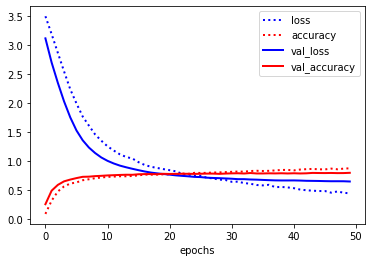

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 4, 4, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 1000)              2049000   
_________________________________________________________________
dense_39 (Dense)             (None, 37)                37037     
Total params: 22,947,517
Trainable params: 6,834,837
Non-trainable params: 16,112,680
_________________________________________________________________
None
Answer is 786 characters long


In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import re

# Load ImageNet pre-trained model, other than VGG16 or VGG19
conv_base = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

def build_model_3_2():
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(37, activation='softmax'))
    
    # Unfreeze some layers
    conv_base.trainable = True
    for layer in conv_base.layers:
        if re.match(r'block14_', layer.name):
            layer.trainable = True
        else:
            layer.trainable = False
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=optimizers.Adam(learning_rate=1e-5), 
        metrics=['accuracy']
    )
    return model

run_evaluation("model_3_2", build_model_3_2, augment_data_multi_class(), base_dir, 
               train=True, generator=True, epochs=50, batch_size=None)

# frozen Xception with 128 dense: 78%
# unfreeze block 14: 78% (+0.5%)
# use GlobalAveragePooling2D instead of flatten and 1000 dense nodes: 79% and fewer weights

answer_q_3_2 = """
I chose the Xception architecture because it claims to have the highest accuracy of
all available archs in Keras that have weight size under 100 MB. Without unfreezing
any layers and using a 128 node hidden layer, I got 78% validation accuracy. Adding
more hidden nodes would bring the weights over 100 MB. By unfreezing the last block
of layers accuracy improved by about 0.5%. Considering there are 37 classes, having
only 128 hidden nodes seems too little to learn complex relations. By using a global
average pooling layer instead of a flattening layer, I reduced the image resolution
which allowed me to use 1000 hidden nodes, while reducing the total number of weights.
With this model I finally achieved 80% accuracy. After about 25 epochs the model
starts to overfit somewhat.
"""

print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3 Visualizing embeddings with tSNE (5 points)

Plot the same embeddings 2D map as in `Question 2.3`, but using `model_3_2` as the feature extractor. 

- Plot the 2D vector on a map highlighting the formed 37 clusters
- Interpret the results from the map in answer_q_3_3

Answer is 256 characters long


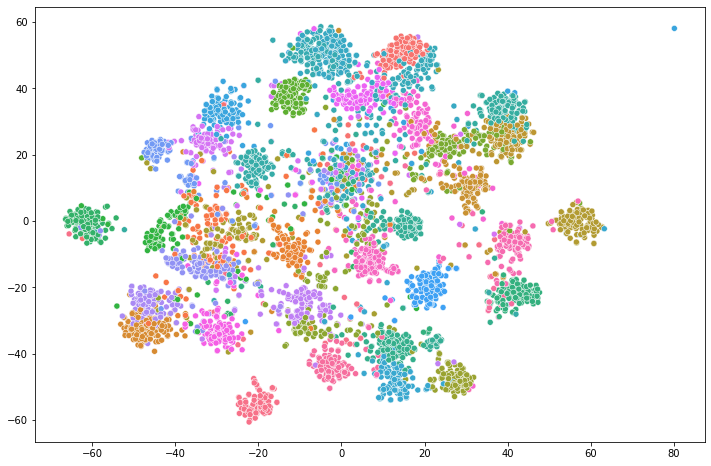

In [58]:
dn_embs_37 = create_embeddings("model_3_2")
d2_embs_37 = compute_tsne(dn_embs_37)

plot_tsne(d2_embs_37, train_classes)

answer_q_3_3 = """
The plot shows that some classes are quite clearly clustered, while some are more spread out
and overlap with others. This suggests that some classes are easier to predict than others.
Overall, the model does quite well considering the amount of classes.
"""

print("Answer is {} characters long".format(len(answer_q_3_3)))